In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
df = pd.read_pickle('../Data/00_clean_custom_ngram')

In [3]:
df.head()

,company_name,job_title,listed_items,url
0,New York Stem Cell Foundation,"PhD Scientist, Neurodegenerative Disease Brain...",develop analyze 2d 3d cellular model neurodege...,https://www.indeed.com/rc/clk?jk=60fa6b914b658...
2,Blue Mesa Health,Front-End Angular Developer,write develop analyze elevate well structured ...,https://www.indeed.com/rc/clk?jk=9aa1678a96dd6...
3,Mayor's Office of Contract Services,"Analyst, Learning Management [JO 380385 & 378151]",provide high quality support user city procure...,https://www.indeed.com/company/Mayor's-Office-...
5,ADP,Senior Strategy Analyst,structure solution complex business problem pr...,https://www.indeed.com/rc/clk?jk=bb01d61a65e12...
7,Avanade,Azure Data Engineer,translate business requirement technical solut...,https://www.indeed.com/rc/clk?jk=e6b5fa9fc5b0e...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

### TF-IDF - KMeans

In [5]:
tf_idf = TfidfVectorizer(max_df=0.95)
tf_idf_array = tf_idf.fit_transform(df.listed_items).toarray()
tf_idf_df = pd.DataFrame(tf_idf_array,columns=tf_idf.get_feature_names())
tf_idf_df.shape

(11643, 32392)

In [6]:
tf_idf_df.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
inertia = []
i = 2
while i <= 10:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,verbose=3)
    km.fit(tf_idf_df.values)
    inertia.append(km.inertia_)
    i += 1

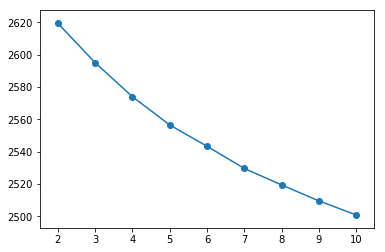

In [15]:
plt.plot(range(2,11,1),inertia)
plt.scatter(range(2,11,1),inertia)

In [ ]:
inertia = []
i = 2
while i <= 25:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,n_init=5)
    km.fit(tf_idf_df.values)
    inertia.append(km.inertia_)
    i += 1

In [ ]:
plt.grid()
plt.plot(range(2,26,1),inertia)
plt.scatter(range(2,26,1),inertia)

### Word2vec

In [ ]:
df = pd.read_pickle('../Data/00_clean_data')

In [ ]:
inertia = []
i = 2
while i <= 25:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,n_init=5)
    km.fit(df.values)
    inertia.append(km.inertia_)
    i += 1

In [ ]:
plt.grid()
plt.plot(range(2,26,1),inertia)
plt.scatter(range(2,26,1),inertia)